# Final Project - Exploratory Analysis

Individuals that are considered expats in certain countries often have high amounts of exposure to the ambient second language in whichever country they reside. As second language learners, this can contribute to a competition between their native languages and second languages for all of the sounds in the phonetic space between the two languages. In Lang & Davidson (in review), one group of long-term American residents in Paris were examined for this type of competition, defined as "phonetic drift," in which their native language sounds begin to shift towards the sounds of the ambient second language, French.

Hypothesis: Do Paris Residents in the Lang & Davidson (in review) belong to their own category of speakers of English or are their vowel utterances in English closer to those of a monolingual English speaker or a even monolingual French speaker? 

In [2]:
%matplotlib inline
#import necessary modules and tell matplotlib to print inline
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression

# Cleaning and Examining Data

In [3]:
df = pd.read_excel('benfinal_GAedit.xls') #importing excel of all raw data
data = df #changing data name so we don't modify original data
#following line deletes unnecessary data for current exploration
data = data.drop(['Comment','hiV','Coronal','FileNum','Midpoint','Duration','Outliers','Comment_Num','GrLangAge','SubGroup','F3','F3nearey'],1)
data #show the data

,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
0,C,English,bets,eh,3h,508.9,1740.6,1.155,1.118
1,C,English,debts,eh,3h,552.7,1810.8,1.254,1.163
2,C,English,jets,eh,3h,495.7,1656.9,1.125,1.064
3,C,English,peck,eh,3h,538.1,1685.1,1.221,1.082
4,C,English,said,eh,3h,465.5,1677.5,1.056,1.077
5,C,English,shed,eh,3h,498.6,1657.3,1.132,1.064
6,C,English,bets,eh,3h,568.1,1967.1,1.201,1.150
7,C,English,debts,eh,3h,574.5,1965.0,1.215,1.149
8,C,English,jets,eh,3h,510.5,1944.4,1.079,1.137
9,C,English,peck,eh,3h,650.2,1775.4,1.375,1.038


In [4]:
data.info() #examine data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 9 columns):
Group           4136 non-null object
Language        4136 non-null object
Word            4136 non-null object
PhonemeOrig     4136 non-null object
Phoneme         4136 non-null object
F1              4136 non-null float64
F2              4136 non-null float64
F1nearey        4136 non-null float64
F2nearey        4136 non-null float64
dtypes: float64(4), object(5)
memory usage: 290.9+ KB


In [5]:
data.index #check index

RangeIndex(start=0, stop=4136, step=1)

In [6]:
data.columns #check columns

Index(['Group', 'Language', 'Word', 'PhonemeOrig ', 'Phoneme', 'F1', 'F2',
       'F1nearey', 'F2nearey'],
      dtype='object')

In [7]:
data['Phoneme']

0       3h
1       3h
2       3h
3       3h
4       3h
5       3h
6       3h
7       3h
8       3h
9       3h
10      3h
11      3h
12      3h
13      3h
14      3h
15      3h
16      3h
17      3h
18      3h
19      3h
20      3h
21      3h
22      3h
23      3h
24      3h
25      3h
26      3h
27      3h
28      3h
29      3h
        ..
4106     y
4107     y
4108     y
4109     y
4110     y
4111     y
4112     y
4113     y
4114     y
4115     y
4116     y
4117     y
4118     y
4119     y
4120     y
4121     y
4122     y
4123     y
4124     y
4125     y
4126     y
4127     y
4128     y
4129     y
4130     y
4131     y
4132     y
4133     y
4134     y
4135     y
Name: Phoneme, Length: 4136, dtype: object

In [9]:
data.set_index(['Subject']) #reset index to subject initials so data is maintained within subjects

KeyError: 'Subject'

In [52]:
# How many of each individual vowel in each group?
# Make example of the English values and French values (average?)

# Make dummy variables of expat or not
# use dummy variables to train model on 7 participants
# run 5 participants through model
# break model by putting through a non-expat

In [10]:
word_freq = data['Word'].value_counts() #obtain number of times each word appears or was uttered in both languages
word_freq

chat              43
pipe              41
peu               41
tes               41
poste             41
deux              41
peau              41
pousses           41
ta                41
petiteœuvre       41
poche             40
vichy             40
douce             40
beau              40
coquilledœuf      40
tete              40
dites             40
peuventacheter    40
bout              40
vœu               40
passe             40
vu                40
peuventdanser     40
du                40
fou               40
fit               40
cesse             40
taux              40
jeux              40
sache             40
                  ..
sue               33
foots             33
hoe               33
said              33
guts              33
pack              33
pits              32
zits              32
shed              32
see               32
butts             32
two               32
pots              32
coop              32
shoes             32
jets              32
spots        

e     243
a     243
oh    241
oe    241
i     240
eh    239
u     237
o1    236
o     236
y     235
uh    200
oo    199
ae    199
ih    198
ij    197
ah    197
3h    196
uw    194
oU    165
Name: Phoneme, dtype: int64


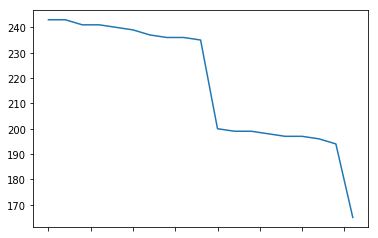

In [12]:
vowel_counts = data.iloc[:,4] 
vowel_counts_plt = vowel_counts.value_counts() #obtaining number of times each vowel eas uttered across both languages
print (vowel_counts_plt)
vowel_counts_plt.plot() #plotting vowel distribution, showing skew towards high vowels /i/ and /u/ in data (consistent with the original experimental question)

# Comparing Cleaned Data

In [13]:
# Indexing the French vowels only to establish average baseline of values and examine distributions
french_vowels = data[(data['Language']=='French') & (data['Group']=='D')]
french_vowels

,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
196,D,French,chat,a,a,637.4,1809.0,1.429,1.049
197,D,French,chat,a,a,639.8,1715.5,1.434,0.995
198,D,French,pas,a,a,705.6,1966.7,1.582,1.141
199,D,French,passe,a,a,615.8,1694.0,1.381,0.983
200,D,French,sa,a,a,605.6,1878.4,1.358,1.090
201,D,French,sache,a,a,650.9,1800.1,1.459,1.044
202,D,French,ta,a,a,589.3,1615.4,1.321,0.937
258,D,French,chat,a,a,631.7,1652.7,1.252,0.903
259,D,French,pas,a,a,718.5,1959.4,1.424,1.070
260,D,French,passe,a,a,736.7,1854.1,1.460,1.013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b666ba8>,
      dtype=object)

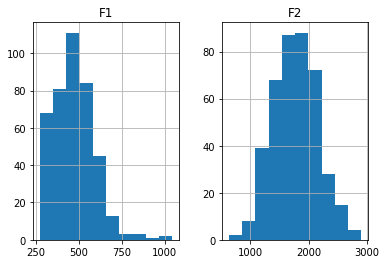

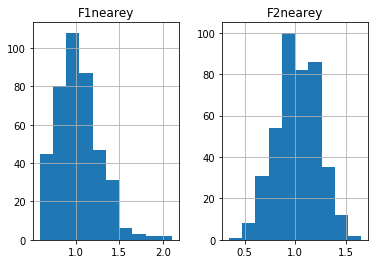

In [14]:
french_vowels.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
french_vowels.hist(['F1nearey','F2nearey'])

/anaconda2/envs/playground/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


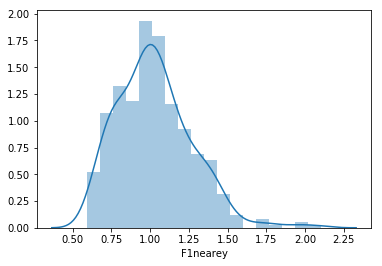

In [15]:
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

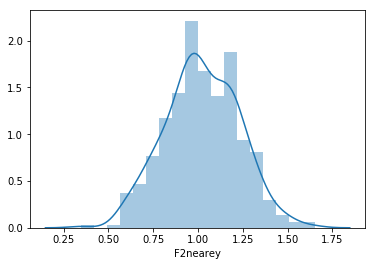

In [16]:
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F2 normalized distribution

In [17]:
# Indexing the English vowels only to establish average baseline of values and examine distributions (Only Group A is used because it's identical to Group B,
# Groups A and B are the same group of monolinguals in English and thus represent the baseline)
english_vowels = data[(data['Language']=='English') & (data['Group']=='A')]
english_vowels

,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
18,A,English,bets,eh,3h,656.5,1844.5,1.244,1.128
20,A,English,debts,eh,3h,615.7,1895.0,1.167,1.159
22,A,English,jets,eh,3h,618.9,1801.1,1.173,1.101
24,A,English,peck,eh,3h,747.0,1692.5,1.415,1.035
26,A,English,said,eh,3h,648.2,1735.8,1.228,1.061
28,A,English,shed,eh,3h,670.7,1763.6,1.271,1.078
52,A,English,bets,eh,3h,603.4,1553.0,1.420,1.037
54,A,English,debts,eh,3h,582.2,1533.9,1.370,1.024
56,A,English,jets,eh,3h,579.0,1493.7,1.362,0.997
58,A,English,peck,eh,3h,613.6,1507.4,1.444,1.006


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b644390>,
      dtype=object)

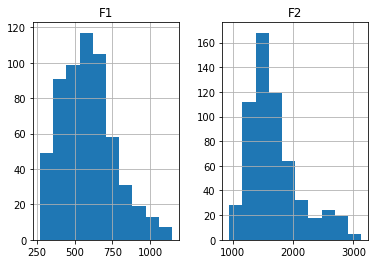

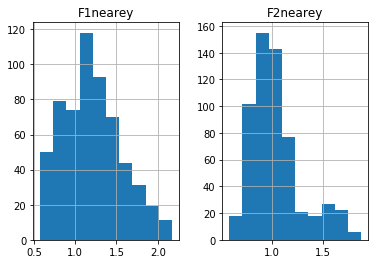

In [18]:
english_vowels.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
english_vowels.hist(['F1nearey','F2nearey'])

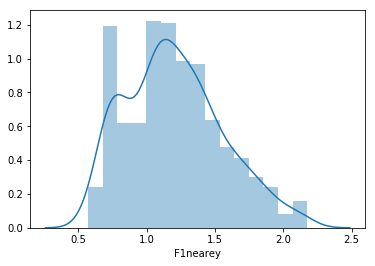

In [19]:
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

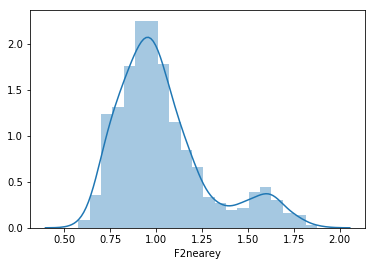

In [20]:
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F2 normalized distribution

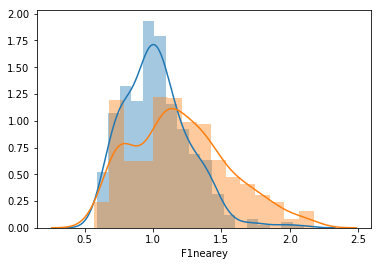

In [21]:
# Normalized French F1 compared to English F1
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

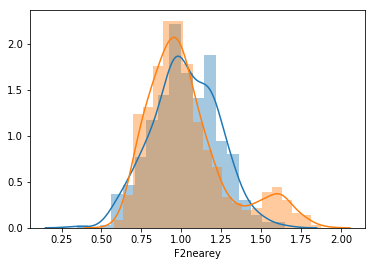

In [22]:
# Normalized French F2 compared to English F2
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c75a588>,
      dtype=object)

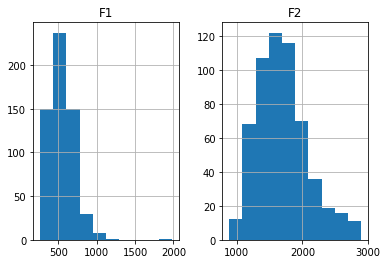

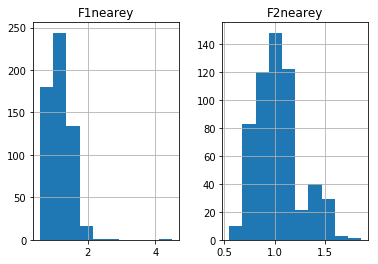

In [23]:
# What does Group C look like? How are the Paris Residents different? (Only concerned with English at this point because we want to know if their English looks more like English or French).
english_vowels_C = data[(data['Language']=='English') & (data['Group']=='C')]
english_vowels_C.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
english_vowels_C.hist(['F1nearey','F2nearey'])

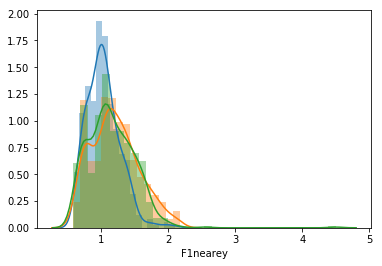

In [24]:
# Normalized French F1 compared to English F1 for Monolinguals AND Paris Residents
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels_C['F1nearey']) #new plot showing more detail of F1 normalized distribution

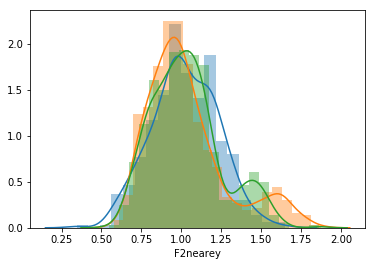

In [25]:
# Normalized French F2 compared to English F2 for Monolinguals AND Paris Residents
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels_C['F2nearey']) #new plot showing more detail of F1 normalized distribution

In [68]:
#Averages
#Average value for each vowel by going into the data of french_vowels or english_vowels via indexing
#Criteria based on string in column "PhonemeOrig" i.e. gather up all of the F1 values for all "i" rows in french_vowels, etc.
#Average those values to get average F1 and F2 value for each utterance

#Time for model to explore if Paris Residents match up into averages of English of French: Are they expats or not?
#Model is sklearn logit with cross validation initially, then try KNN

# Extract individual vowel sets and average normalized values

In [26]:
french_vowels_i = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='i')]
french_vowels_y = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='y')]
french_vowels_u = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='u')]
french_vowels_o1 = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='o1')]
french_vowels_eh = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='eh')]
french_vowels_a = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='a')]
french_vowels_oe = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='oe')]
french_vowels_e = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='e')]
french_vowels_o = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='o')]
french_vowels_oh = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='oh')]

In [27]:
english_vowels_ij = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ij')]
english_vowels_uw = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='uw')]
english_vowels_3h = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='3h')]
english_vowels_ae = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ae')]
english_vowels_ih = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ih')]
english_vowels_oU = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='oU')]
english_vowels_oo = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='oo')]
english_vowels_ah = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ah')]
english_vowels_uh = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='uh')]

In [28]:
frf1_i = french_vowels_i['F1nearey'].mean()
frf1_y = french_vowels_y['F1nearey'].mean()
frf1_u = french_vowels_u['F1nearey'].mean()
frf1_o1 = french_vowels_o1['F1nearey'].mean()
frf1_eh = french_vowels_eh['F1nearey'].mean()
frf1_a = french_vowels_a['F1nearey'].mean()
frf1_oe = french_vowels_oe['F1nearey'].mean()
frf1_e = french_vowels_e['F1nearey'].mean()
frf1_o = french_vowels_o['F1nearey'].mean()
frf1_oh = french_vowels_oh['F1nearey'].mean()

frf2_i = french_vowels_i['F2nearey'].mean()
frf2_y = french_vowels_y['F2nearey'].mean()
frf2_u = french_vowels_u['F2nearey'].mean()
frf2_o1 = french_vowels_o1['F2nearey'].mean()
frf2_eh = french_vowels_eh['F2nearey'].mean()
frf2_a = french_vowels_a['F2nearey'].mean()
frf2_oe = french_vowels_oe['F2nearey'].mean()
frf2_e = french_vowels_e['F2nearey'].mean()
frf2_o = french_vowels_o['F2nearey'].mean()
frf2_oh = french_vowels_oh['F2nearey'].mean()

In [29]:
print frf1_i
print frf1_y
print frf1_u
print frf1_o1
print frf1_eh
print frf1_a
print frf1_oe
print frf1_e
print frf1_o
print frf1_oh

print frf2_i
print frf2_y
print frf2_u
print frf2_o1
print frf2_eh
print frf2_a
print frf2_oe
print frf2_e
print frf2_o
print frf2_oh

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(frf1_i)? (<ipython-input-29-32acda57fb11>, line 1)

In [30]:
enf1_ij = english_vowels_ij['F1nearey'].mean()
enf1_uw = english_vowels_uw['F1nearey'].mean()
enf1_3h = english_vowels_3h['F1nearey'].mean()
enf1_ae = english_vowels_ae['F1nearey'].mean()
enf1_ih = english_vowels_ih['F1nearey'].mean()
enf1_oU = english_vowels_oU['F1nearey'].mean()
enf1_oo = english_vowels_oo['F1nearey'].mean()
enf1_ah = english_vowels_ah['F1nearey'].mean()
enf1_uh = english_vowels_uh['F1nearey'].mean()

enf2_ij = english_vowels_ij['F2nearey'].mean()
enf2_uw = english_vowels_uw['F2nearey'].mean()
enf2_3h = english_vowels_3h['F2nearey'].mean()
enf2_ae = english_vowels_ae['F2nearey'].mean()
enf2_ih = english_vowels_ih['F2nearey'].mean()
enf2_oU = english_vowels_oU['F2nearey'].mean()
enf2_oo = english_vowels_oo['F2nearey'].mean()
enf2_ah = english_vowels_ah['F2nearey'].mean()
enf2_uh = english_vowels_uh['F2nearey'].mean()

In [31]:
print enf1_ij
print enf1_uw
print enf1_3h
print enf1_ae
print enf1_ih
print enf1_oU
print enf1_oo
print enf1_ah
print enf1_uh

print enf2_ij
print enf2_uw
print enf2_3h
print enf2_ae
print enf2_ih
print enf2_oU
print enf2_oo
print enf2_ah
print enf2_uh

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(enf1_ij)? (<ipython-input-31-d34815d08e4c>, line 1)

# Conclusions

The data are unclear in these visual representations. It seems that these Paris Residents are producing distrubtions on F1 and F2 normalized values that are similar to American English monolinguals (see Green and Red distributions) while the French monolinguals (blue distribution) have productions that when compared to either the Paris Residents or the American monolinguals, demonstrate that there is still a difference between languages, regardless of experience in the L2 environment. 

# Final Project - Modeling

In [32]:
# Dummy Variables, PR = Paris Resident
# data['PR'] = df['Group'].map({'C': 1, 'A': 0, 'B': 0, 'D': 0})
data = data.join(pd.get_dummies(data['Group']))
data = data.join(pd.get_dummies(data['Phoneme'], drop_first=True, prefix='vowel_'))
data.set_index(['Subject'])
data

KeyError: 'Subject'

In [33]:
data.columns

Index(['Group', 'Language', 'Word', 'PhonemeOrig ', 'Phoneme', 'F1', 'F2',
       'F1nearey', 'F2nearey', 'A', 'B', 'C', 'D', 'vowel__a', 'vowel__ae',
       'vowel__ah', 'vowel__e', 'vowel__eh', 'vowel__i', 'vowel__ih',
       'vowel__ij', 'vowel__o', 'vowel__o1', 'vowel__oU', 'vowel__oe',
       'vowel__oh', 'vowel__oo', 'vowel__u', 'vowel__uh', 'vowel__uw',
       'vowel__y'],
      dtype='object')

In [34]:
data_ready = data.loc[:, ['F1nearey', 'F2nearey', 'C', 'vowel__a', 'vowel__ae', 'vowel__ah', 'vowel__e', 'vowel__eh', 'vowel__i', 'vowel__ih', 'vowel__ij', 'vowel__o', 'vowel__o1', 'vowel__oU', 'vowel__oe', 'vowel__oh', 'vowel__oo', 'vowel__u', 'vowel__uh', 'vowel__uw', 'vowel__y']]
data_ready

,F1nearey,F2nearey,C,vowel__a,vowel__ae,vowel__ah,vowel__e,vowel__eh,vowel__i,vowel__ih,...,vowel__o,vowel__o1,vowel__oU,vowel__oe,vowel__oh,vowel__oo,vowel__u,vowel__uh,vowel__uw,vowel__y
0,1.155,1.118,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.254,1.163,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.125,1.064,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.221,1.082,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.056,1.077,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.132,1.064,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.201,1.150,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.215,1.149,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.079,1.137,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.375,1.038,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare train and test groups from cleaned data and run model

The Logit model from Statsmodels is the best choice in this scenario because of it's prediction capabilities. The interest in this data exploration is whether or not certain utterances belong to Paris Residents or remain in the realm of monolingual American English speakers. The model will need to predict based one a number of factors including each individual vowel and the Logit function can handle this with relative ease.

In [35]:
from sklearn.model_selection import train_test_split

X = data_ready.drop('C', axis=1)
y = data_ready['C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=84)

In [36]:
logit_mod = sm.Logit(y_train, X_train)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

/anaconda2/envs/playground/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda2/envs/playground/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda2/envs/playground/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      C   No. Observations:                 2481
Model:                          Logit   Df Residuals:                     2461
Method:                           MLE   Df Model:                           19
Date:                Sun, 26 May 2019   Pseudo R-squ.:                     inf
Time:                        11:35:48   Log-Likelihood:            -4.0484e+05
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1nearey      -0.4185      0.212     -1.970      0.049      -0.835      -0.002
F2nearey      -0.2547      0.254     -1.001      0.317      -0.753       0.244
vowel__a      -0.2777      0.263     -1.057      0.291      -0.793       0.237
vowel__ae      0.2343      0.306      0.766      0.444      -0.365       0.834
vowel__ah      0.0677      0.291      0.232      0.816      -0.504       0.639
vowel__e      -0.2868      0.268     -1.070      0.284      -0.812       0.238
vowel__eh     -0.2168      0.261     -0.830      0.406      -0.728       0.295
vowel__i      -0.4137      0.338     -1.225      0.221      -1.076       0.248
vowel__ih     -0.0027      0.275     -0.010      0.992      -0.542       0.537
vowel__ij     -0.0936      0.350     -0.267      0.789      -0.780       0.593
vowel__o      -0.4120      0.234     -1.761      0.078      -0.871       0.047
vowel__o1     -0.3216      0.247     -1.302      0.193      -0.806       0.162
vowel__oU     -0.1888      0.264     -0.714      0.475      -0.707       0.330
vowel__oe     -0.5635      0.250     -2.256      0.024      -1.053      -0.074
vowel__oh     -0.3987      0.241     -1.655      0.098      -0.871       0.074
vowel__oo     -0.1224      0.247     -0.495      0.621      -0.608       0.363
vowel__u      -0.2923      0.224     -1.307      0.191      -0.730       0.146
vowel__uh      0.3654      0.261      1.398      0.162      -0.147       0.878
vowel__uw      0.0746      0.261      0.285      0.776      -0.438       0.587
vowel__y      -0.4482      0.263     -1.701      0.089      -0.964       0.068
==============================================================================
"""

# AUC to check model efficacy

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, auc
auc = roc_auc_score(y_test, logit_res.predict(X_test))
print (auc)

0.5251785487747593


# Cross Validation to potentially improve AUC

In [40]:
from sklearn import grid_search, cross_validation

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(X_train), n_folds=5),
    scoring='roc_auc'
)


gs.fit(X_train, y_train)
gs.grid_scores_

ImportError: cannot import name 'grid_search' from 'sklearn' (/anaconda2/envs/playground/lib/python3.7/site-packages/sklearn/__init__.py)

In [82]:
print gs.estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [83]:
best_model = gs.best_estimator_
best_auc = roc_auc_score(y_test, best_model.predict(X_test))
best_auc

0.5

In [84]:
gs.best_params_

{'C': 0.0001, 'class_weight': None}

# Calculation of the Odds Ratios

In [85]:
print np.exp(logit_res.params)

F1nearey     0.658036
F2nearey     0.775162
vowel__a     0.757512
vowel__ae    1.264067
vowel__ah    1.070044
vowel__e     0.750638
vowel__eh    0.805089
vowel__i     0.661217
vowel__ih    0.997292
vowel__ij    0.910643
vowel__o     0.662329
vowel__o1    0.725014
vowel__oU    0.827924
vowel__oe    0.569220
vowel__oh    0.671159
vowel__oo    0.884760
vowel__u     0.746573
vowel__uh    1.441039
vowel__uw    1.077400
vowel__y     0.638800
dtype: float64


In [86]:
params = logit_res.params
conf = logit_res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

               2.5%     97.5%        OR
F1nearey   0.433895  0.997962  0.658036
F2nearey   0.470774  1.276358  0.775162
vowel__a   0.452594  1.267855  0.757512
vowel__ae  0.693898  2.302739  1.264067
vowel__ah  0.604378  1.894501  1.070044
vowel__e   0.443953  1.269182  0.750638
vowel__eh  0.482646  1.342946  0.805089
vowel__i   0.341037  1.281993  0.661217
vowel__ih  0.581619  1.710041  0.997292
vowel__ij  0.458453  1.808846  0.910643
vowel__o   0.418714  1.047683  0.662329
vowel__o1  0.446852  1.176330  0.725014
vowel__oU  0.493029  1.390301  0.827924
vowel__oe  0.348853  0.928790  0.569220
vowel__oh  0.418489  1.076385  0.671159
vowel__oo  0.544698  1.437126  0.884760
vowel__u   0.481720  1.157044  0.746573
vowel__uh  0.863417  2.405086  1.441039
vowel__uw  0.645423  1.798497  1.077400
vowel__y   0.381184  1.070520  0.638800


# Conclusion

The trained data set and cross validation of each of the vowels and the normalized F1 and F2 values do not seem to be predicting whether or not a certain individual utterance came from a Paris resident (C). The most salient explanation for this result is that the original data set is fairly small and thus the model isn't able to capture the differences amongst the population. The differences could be isolated on a more individual level requiring a linear regression model or even t-test statistics to investigate. The model doesn't seem to be overfitting or underfitting either because it can't really fit to the low instance count in teh first place. Other models such as KNN may provide at least a clearer picture or visual representation of the data spread, but it's unlikely that they would resolve the problem with prediction or representation of Paris Residents again due to the low instance count. Further data of a similar nature, that is, more PAris resident utterances from a larger speaker group would provide the necessary push for the prediction to potentially work out. As it stands, the model is only predicting near baseline. The model generally needs more data so it can make better distinctions between French vowels and English vowels. This will then make the distinction of whether or not someone is a Paris Resident more clear as some of their vowels should trend towards French while others remain in the English realm. However, the odds of certain vowels being Paris Resident vowels do seem to be trending in the right direction (i, y, u, ij, uw, ah, ae, and eh were shown to be significantly different from each other in the original study).